<a href="https://colab.research.google.com/github/shreyansh273/Customer-churn-prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir /root/.kaggle
!cp kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c customer-churn-prediction-2020

  0% 0.00/68.4k [00:00<?, ?B/s]
100% 68.4k/68.4k [00:00<00:00, 24.3MB/s]
  0% 0.00/383k [00:00<?, ?B/s]
100% 383k/383k [00:00<00:00, 53.3MB/s]
  0% 0.00/6.04k [00:00<?, ?B/s]
100% 6.04k/6.04k [00:00<00:00, 5.84MB/s]


In [5]:
!ls

kaggle.json  sample_data  sampleSubmission.csv	test.csv  train.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()

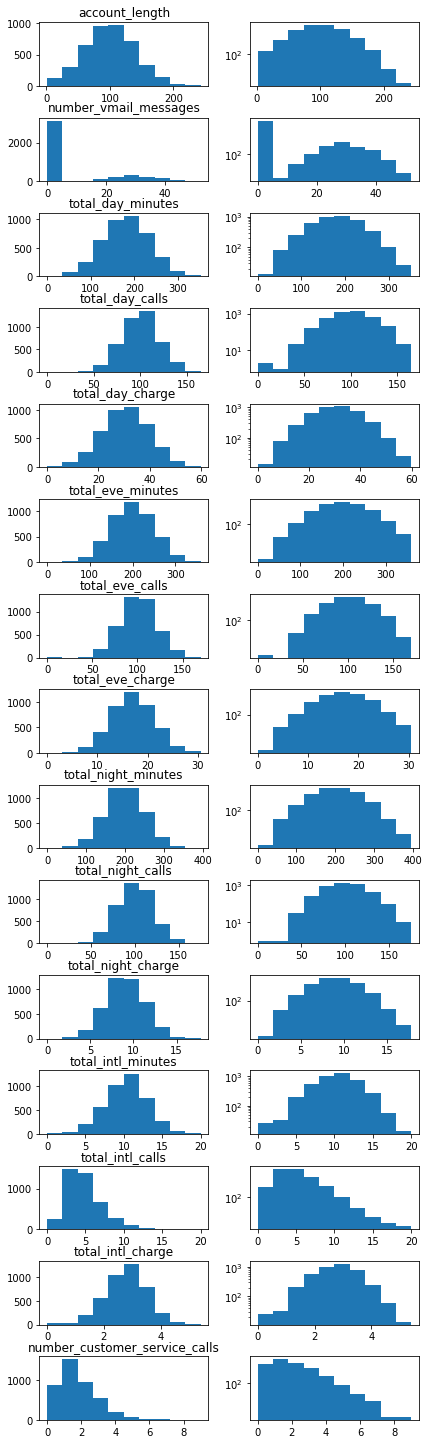

In [ ]:
n_rows = len(num_cols)
n_cols = 2
fig, ax= plt.subplots(n_rows, n_cols, figsize=(6,20))
fig.tight_layout() 
for row_num in range(n_rows):
  for col_num in range(n_cols):
    if col_num==0:
      ax[row_num, col_num].hist(train[num_cols[row_num]])
      ax[row_num, col_num].set_title(num_cols[row_num])
    else:
      ax[row_num, col_num].hist(train[num_cols[row_num]], log=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

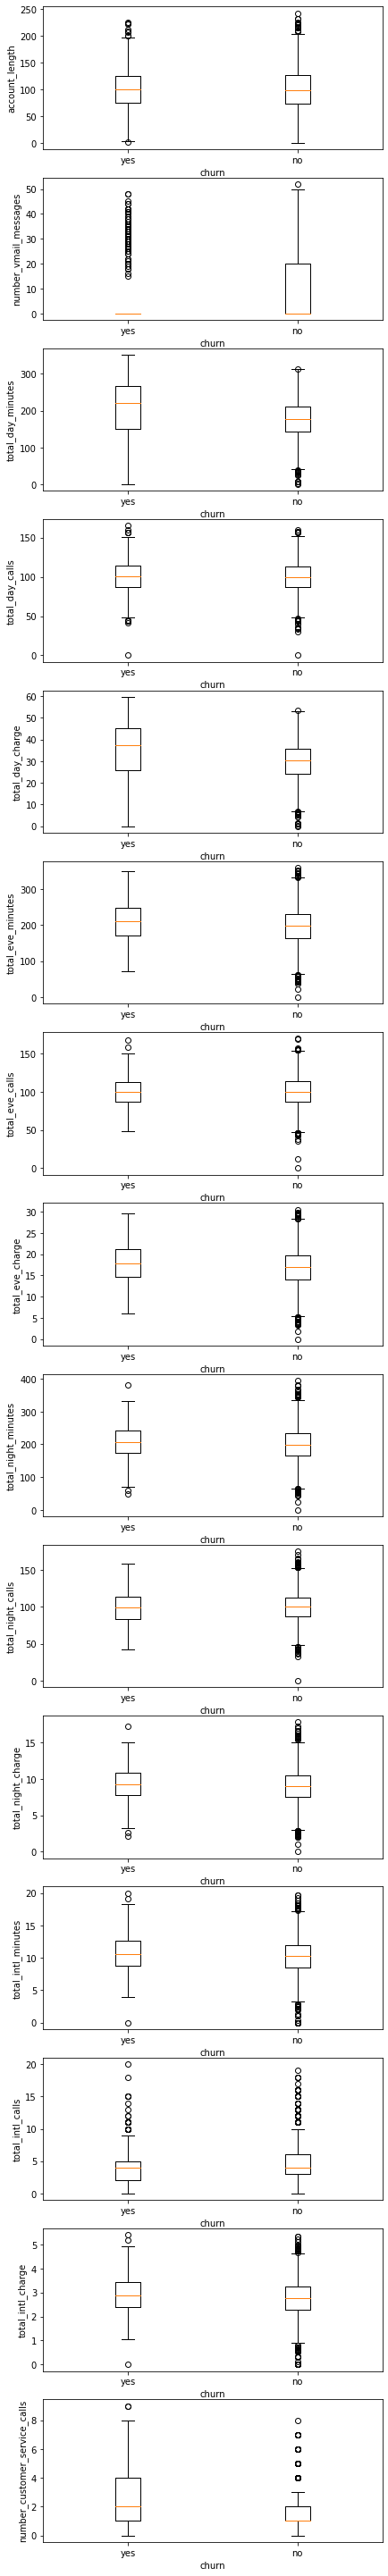

In [ ]:
n_rows = len(num_cols)
n_cols = 1
fig, ax= plt.subplots(n_rows, n_cols, figsize=(6,40))
fig.tight_layout() 
for row_num in range(n_rows):
    ax[row_num].boxplot([train.loc[train.churn=="yes",num_cols[row_num]], train.loc[train.churn=="no",num_cols[row_num]]])
    ax[row_num].set_xticklabels(["yes","no"])
    ax[row_num].set_xlabel("churn")
    ax[row_num].set_ylabel(num_cols[row_num])

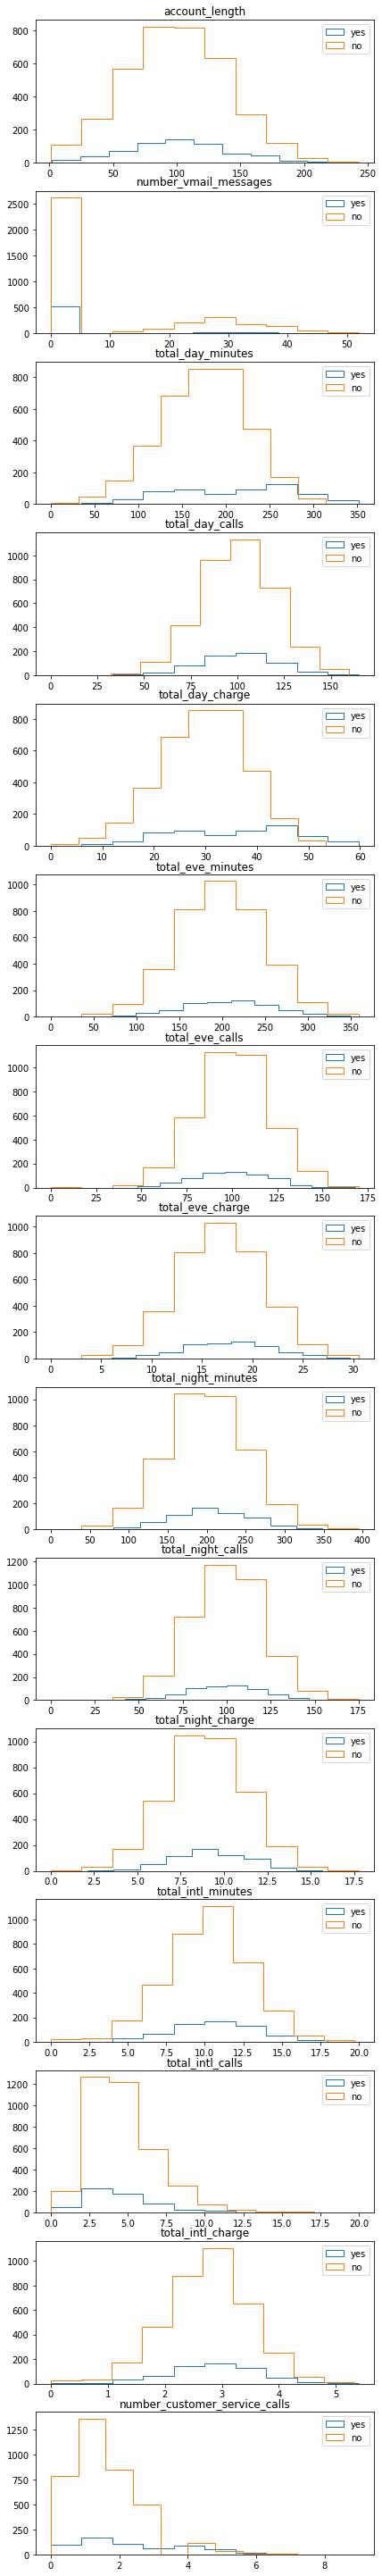

In [ ]:
n_rows = len(num_cols)
n_cols = 1
fig, ax= plt.subplots(n_rows, n_cols, figsize=(6,40))
fig.tight_layout() 
for row_num in range(n_rows):
    ax[row_num].hist(train.loc[train.churn=="yes",num_cols[row_num]], histtype="step", label="yes")
    ax[row_num].hist(train.loc[train.churn=="no",num_cols[row_num]], histtype="step", label="no")
    ax[row_num].set_title(num_cols[row_num])
    ax[row_num].legend()

In [ ]:
train[num_cols].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.00,-0.01,-0.00,0.02,-0.00,-0.01,0.01,-0.01,-0.01,-0.00,-0.01,0.00,0.01,0.00,0.00
number_vmail_messages,-0.01,1.00,0.00,-0.01,0.00,0.01,0.00,0.01,0.02,0.00,0.02,0.01,0.01,0.01,-0.02
total_day_minutes,-0.00,0.00,1.00,0.00,1.00,-0.01,0.01,-0.01,0.01,-0.00,0.01,-0.02,0.00,-0.02,-0.00
total_day_calls,0.02,-0.01,0.00,1.00,0.00,0.01,0.00,0.01,0.00,-0.00,0.00,0.01,0.01,0.01,-0.02
total_day_charge,-0.00,0.00,1.00,0.00,1.00,-0.01,0.01,-0.01,0.01,-0.00,0.01,-0.02,0.00,-0.02,-0.00
total_eve_minutes,-0.01,0.01,-0.01,0.01,-0.01,1.00,0.00,1.00,-0.01,0.01,-0.01,-0.00,0.01,-0.00,-0.01
total_eve_calls,0.01,0.00,0.01,0.00,0.01,0.00,1.00,0.00,0.01,-0.01,0.01,-0.01,0.00,-0.01,0.01
total_eve_charge,-0.01,0.01,-0.01,0.01,-0.01,1.00,0.00,1.00,-0.01,0.01,-0.01,-0.00,0.01,-0.00,-0.01
total_night_minutes,-0.01,0.02,0.01,0.00,0.01,-0.01,0.01,-0.01,1.00,0.02,1.00,-0.00,-0.02,-0.00,-0.01
total_night_calls,-0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.01,0.01,0.02,1.00,0.02,0.00,0.00,0.00,-0.01


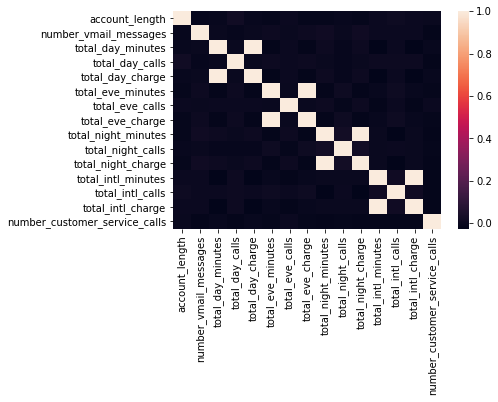

In [ ]:
# calculate the correlation matrix
corr = train[num_cols].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [8]:
train.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'], axis=1, inplace=True)

***Eda categorical variables***

In [ ]:
cat_col = train.select_dtypes(include='object').columns.tolist()

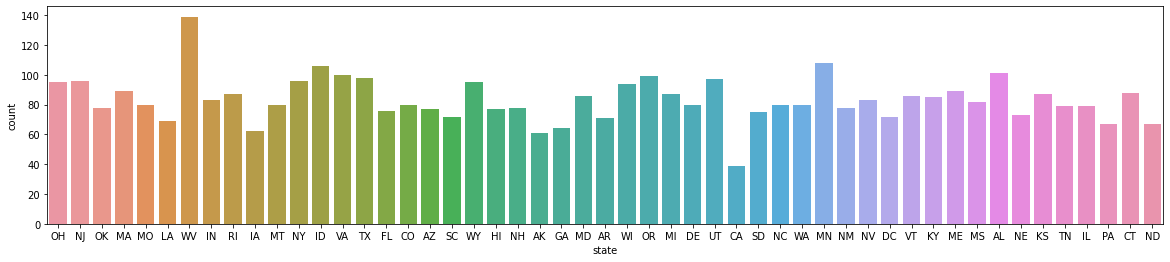

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(data = train, x='state')
plt.show()

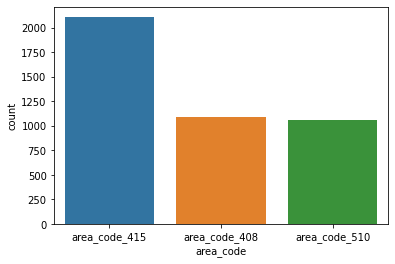

In [ ]:
sns.countplot(data = train, x='area_code')

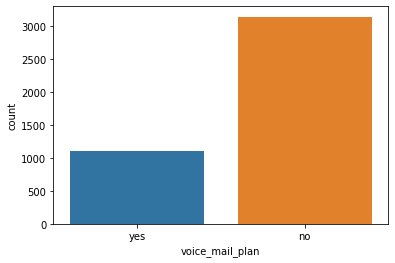

In [ ]:
sns.countplot(data = train, x='voice_mail_plan')

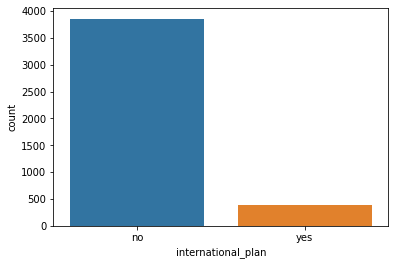

In [ ]:
sns.countplot(data = train, x='international_plan')

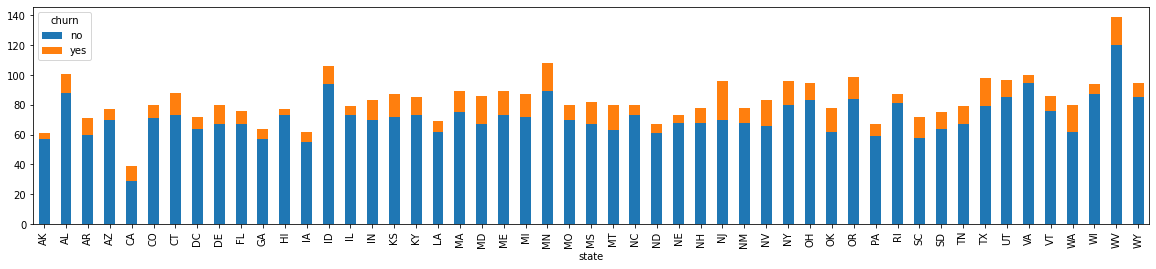

In [ ]:
train.groupby(['state','churn'])['account_length'].count().unstack().plot(kind='bar', stacked=True, figsize=(20, 4))

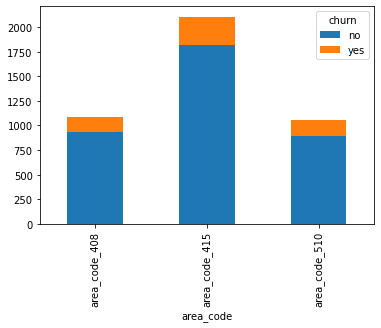

In [ ]:
train.groupby(['area_code','churn'])['account_length'].count().unstack().plot(kind='bar', stacked=True)

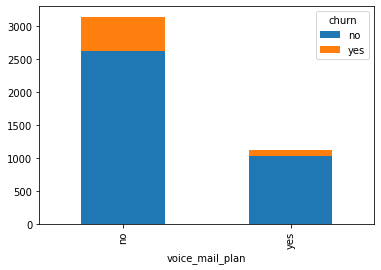

In [ ]:
train.groupby(['voice_mail_plan','churn'])['account_length'].count().unstack().plot(kind='bar', stacked=True)

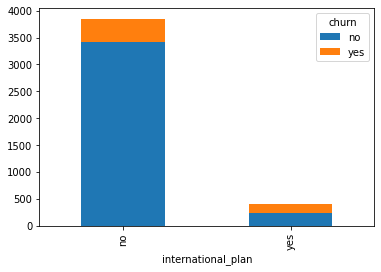

In [ ]:
train.groupby(['international_plan','churn'])['account_length'].count().unstack().plot(kind='bar', stacked=True)

***Data Preprocessing***

In [9]:
train2 = pd.get_dummies(train)
train2.drop(["state_WY","area_code_area_code_510","international_plan_no","voice_mail_plan_no","churn_no"], axis=1, inplace=True)
train2.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,area_code_area_code_408,area_code_area_code_415,international_plan_yes,voice_mail_plan_yes,churn_yes
0,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,121,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [42]:
X= train2.drop('churn_yes', axis=1)
y=train2['churn_yes']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

***Train test split***

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y )

***Scaling***

In [63]:
scalar = MinMaxScaler()
X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns)

In [44]:
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

***Downsampling***

In [65]:
X_train2  = X_train_scaled.copy()
X_train2["churn_yes"] = y_train.tolist()
X_train2_majority = X_train2.loc[X_train2.churn_yes==0]
X_train2_minority = X_train2.loc[X_train2.churn_yes==1]
X_train2_majority_downsampled = resample(X_train2_majority, replace= False, n_samples= len(X_train2_minority), random_state=42)
X_train2_downsampled = pd.concat([X_train2_majority_downsampled,X_train2_minority])
y_train_downsampled = X_train2_downsampled.churn_yes
X_train_downsampled = X_train2_downsampled.drop("churn_yes", axis=1)

***Upsampling***

In [66]:
X_train2_minority_upsampled = resample(X_train2_minority, replace= True, n_samples= len(X_train2_majority), random_state=42)
X_train2_upsampled = pd.concat([X_train2_minority_upsampled,X_train2_majority])
y_train_upsampled = X_train2_upsampled.churn_yes
X_train_upsampled = X_train2_upsampled.drop("churn_yes", axis=1)

***Logistic Regression - normal***

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test_scaled)
print(log_reg.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.72
[[807 289]
 [ 68 111]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1096
           1       0.28      0.62      0.38       179

    accuracy                           0.72      1275
   macro avg       0.60      0.68      0.60      1275
weighted avg       0.83      0.72      0.76      1275



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


***Random Forest - downsampled***

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_downsampled, y_train_downsampled)
y_pred2 = rf.predict(X_test_scaled)
print(rf.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

0.8541176470588235
[[936 160]
 [ 26 153]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1096
           1       0.49      0.85      0.62       179

    accuracy                           0.85      1275
   macro avg       0.73      0.85      0.77      1275
weighted avg       0.91      0.85      0.87      1275



***Random Forest - normal***

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred2 = rf.predict(X_test_scaled)
print(rf.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

0.9466666666666667
[[1095    1]
 [  67  112]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1096
           1       0.99      0.63      0.77       179

    accuracy                           0.95      1275
   macro avg       0.97      0.81      0.87      1275
weighted avg       0.95      0.95      0.94      1275



***Random Forest - upsampled***

In [67]:
rf = RandomForestClassifier()
rf.fit(X_train_upsampled, y_train_upsampled)
y_pred2 = rf.predict(X_test_scaled)
print(rf.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

0.9450980392156862
[[1079   17]
 [  53  126]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1096
           1       0.88      0.70      0.78       179

    accuracy                           0.95      1275
   macro avg       0.92      0.84      0.88      1275
weighted avg       0.94      0.95      0.94      1275



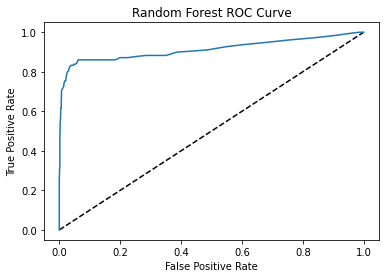

In [ ]:
y_pred_prob = rf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_prob)

0.9132727439546547

***Neural Network***

In [18]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

In [68]:
model= Sequential()
#first hidden layer
model.add(Dense(16, input_shape=(X_train_upsampled.shape[1],), activation='relu'))
#second hidden layer
model.add(Dense(8, activation='relu'))
#final layer`
model.add(Dense(1, activation='softmax'))
#summary
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#compile model
model.compile('sgd', loss='binary_crossentropy', metrics=['accuracy'])
#train model
history = model.fit(X_train_upsampled, y_train_upsampled ,validation_split = 0.2, epochs=100)


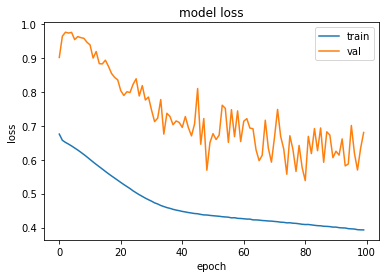

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()